# **Master of Data Science and Engineering (MCDE)**

## **Deep Learning**

* Logistic Regression
* Neural Network

## **1. Logistic Regression**
(for this exercise you will be using a small synthetic dataset with two predictive attributes and a binary classification output.)

a) Generate the dataset using a sample generator from scikit-learn. Use the sklearn.datasets.make moons
generator, with 300 samples and a noise standard deviation of 0.2. Note that binary class labels are commonly represented as 0 and 1.

b) Train a simple logistic regression model in the first 80% of the data and evaluate the quality in the
remaining 20%. State the selected learning rate and the prediction error in the dataset.

c) Is it possible to obtain a better result for this dataset using a logistic regression model? Explain why

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

#Moon Dataset
from sklearn.datasets import make_moons

#Make Circles Dataset
from sklearn.datasets import make_circles

#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, 
#with 60000 images per class. There are 50000 training images and 10000 test images.
from keras.datasets import cifar10
import keras.utils.np_utils as np_utils

%matplotlib inline

## a)

#### Generate the dataset

In [ ]:
# generate 2d classification dataset
x, y = make_moons(n_samples=300, noise=0.2)

In [ ]:
print(x[:10])
print(y[:10])

[[-0.80579491 -0.1217781 ]
 [ 0.2313366   0.745148  ]
 [-0.96113489  0.08052683]
 [ 1.30477242 -0.48618234]
 [-0.30880611  0.54274781]
 [ 0.09538002  1.03620554]
 [ 1.7191518  -0.56435312]
 [ 1.21883189  0.07151137]
 [-1.00128649 -0.30139347]
 [ 0.64671348  0.65798801]]
[0 0 0 1 0 0 1 1 0 0]


#### Binary class labels

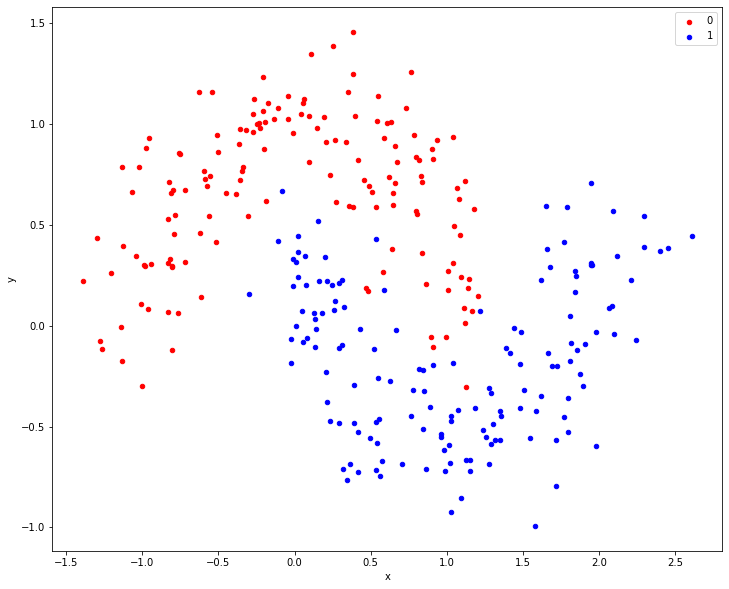

In [ ]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(12,10))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

## b)

### Selecting data set

In [ ]:
# 80 % of dataset for training
# 20 % of dataset for testing
x_train, x_test, y_train, y_real = train_test_split(x,y, test_size=0.20, random_state=42)

#For exercise 2
x_train_2 = x_train
x_test_2 = x_test
y_train_2 = y_train
y_real_2 =  y_real

### Model

In [ ]:
alpha = 1

# (loss = log) gives logistic regression, a probabilistic classifier.
 
#Training
model = SGDClassifier(loss="log", max_iter=1000, alpha = alpha)
model.fit(x_train,y_train)

SGDClassifier(alpha=1, loss='log')

We can also get the value of the slope 𝑏₁ (beta) and the intercept 𝑏₀ (alpha) of the linear function 𝑓

In [ ]:
print(model.intercept_)
print(model.coef_)

[-0.07300812]
[[ 0.20742485 -0.17295511]]


### Evaluation 20% of the data

* Does the model really work for our data? (in fact, we should also test with unseen data)
* Testing with **20% of the dataset**

In [ ]:
p_pred = model.predict_log_proba(x_test)
y_pred = model.predict(x_test)

print(p_pred[:10])
print(y_pred[:10])

[[-0.88966553 -0.52897793]
 [-0.81728485 -0.58273188]
 [-0.82037597 -0.58029378]
 [-0.66716083 -0.71982688]
 [-0.66402048 -0.72314777]
 [-0.59001336 -0.8081538 ]
 [-0.563625   -0.84197713]
 [-0.7672204  -0.62418443]
 [-0.58366514 -0.81610612]
 [-0.59452211 -0.80257421]]
[1 1 1 0 0 0 0 1 0 0]


#### Model Score

The score takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

In [ ]:
model_score_b = model.score(x_test,y_real)
print(f"Training (80% data) Score: { model.score(x_train,y_train):.2f}" )
print(f"Testing (20% data) Score: {model_score_b:.2f}")

Training (80% data) Score: 0.81
Testing (20% data) Score: 0.83


#### Classification Report

In [ ]:
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

#### Classification Matrix
report = classification_report(y_train, y_pred_train)
print('TRAINING DATASET:')
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('TESTING DATASET:')
report = classification_report(y_real, y_pred)
print(report)

TRAINING DATASET:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       119
           1       0.83      0.78      0.80       121

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

 
 
TESTING DATASET:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



#### Confusion Matrix

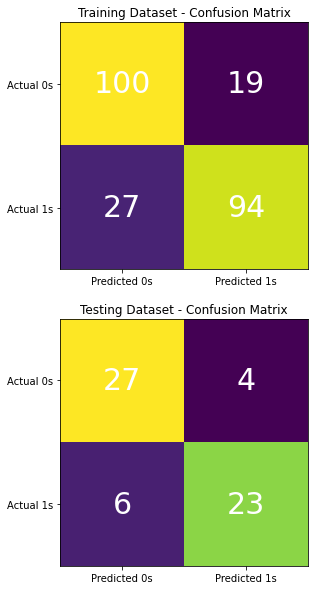

In [ ]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm = confusion_matrix(y_real, y_pred)

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_train)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Training Dataset - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_train[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Testing Dataset - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

#### Predictive Classification x Real Classification 
(20% of the dataset)

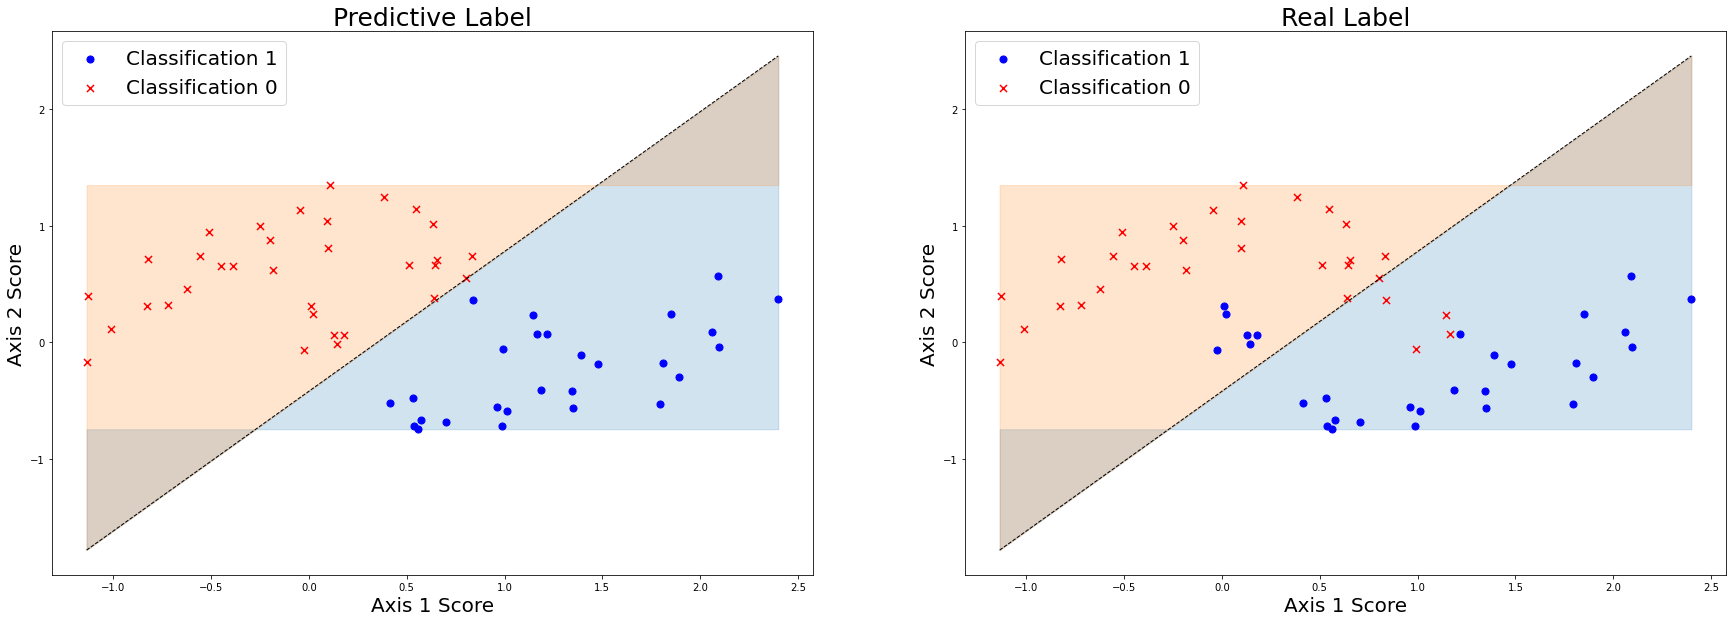

In [ ]:
#Defining Data Frame
df = pd.DataFrame(x_test, columns={'Axis1', 'Axis2'})
df['y_real'] = y_real
df['y_pred'] = y_pred

#Defining Values
#Predictive
Valor1 = df[df['y_pred'].isin([1])]
Valor0 = df[df['y_pred'].isin([0])]
#Real
Valor_Real_1 = df[df['y_real'].isin([1])]
Valor_Real_0 = df[df['y_real'].isin([0])]

# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and slope of the decision boundary
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary
xmin, xmax = min(df['Axis1']), max(df['Axis1'])
ymin, ymax =  min(df['Axis2']), max(df['Axis2'])

xd = np.array([xmin, xmax])
yd = m*xd + c

#Plots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

#Plot1
ax1.plot(xd, yd, 'k', lw=1, ls='--')
ax1.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax1.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

ax1.scatter(Valor1["Axis1"],Valor1['Axis2'],s=50, c='b',marker='o', label='Classification 1')
ax1.scatter(Valor0["Axis1"],Valor0['Axis2'],s=50, c='r',marker='x', label='Classification 0')
ax1.legend(fontsize=20)
ax1.set_xlabel('Axis 1 Score',fontsize=20)
ax1.set_ylabel('Axis 2 Score',fontsize=20)
ax1.set_title('Predictive Label',fontsize=25)

#PLot2
ax2.plot(xd, yd, 'k', lw=1, ls='--')
ax2.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax2.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

ax2.scatter(Valor_Real_1["Axis1"],Valor_Real_1['Axis2'],s=50, c='b',marker='o', label='Classification 1')
ax2.scatter(Valor_Real_0["Axis1"],Valor_Real_0['Axis2'],s=50, c='r',marker='x', label='Classification 0')
ax2.legend(fontsize=20)
ax2.set_xlabel('Axis 1 Score',fontsize=20)
ax2.set_ylabel('Axis 2 Score',fontsize=20)
ax2.set_title('Real Label', fontsize = 25)

fig.show()

It is clear that the predicted classifications respect the decision boundary. However, when we plot the graph with the actual classifications, it is possible to see that some points do not respect this limit. Therefore, they are **points incorrectly classified by the model.** _(check Real Label Plot)_

### Answer b):

In [ ]:
print('Learning Rate:', alpha)
print('Prediction Error (20% of data for testing): ', round((1-model_score_b)*100,2),"%")

Learning Rate: 1
Prediction Error (20% of data for testing):  16.67 %


## c)

Get a better classification prediction from Logistic Regression: 

* Reduce the learning rate (alpha = 0.0001)
* Increase the number of interations to achieve a better **weight** with **lower cost**
* Normalize the dataset to have points on the same scale. 


#### Dataset Standartization

In [ ]:
scaler = StandardScaler()

# 80 % of dataset for training
#Normalize 
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# 20 % of dataset for testing
#Test data set

#Normalize 
scaler.fit(x_test)
x_test = scaler.transform(x_test)

### **Parameters modification**

#### **alpha** (Learning Rate)
* old alpha =1
* new alpha = 0.0001

#### **interactions**
* old max interations = 1.000
* new max interations = 1.000.000

In [ ]:
#Training
model = SGDClassifier(loss="log", max_iter=1000000, alpha = 0.0001)
model.fit(x_train,y_train)

SGDClassifier(loss='log', max_iter=1000000)

In [ ]:
print(model.intercept_)
print(model.coef_)

[-1.01310376]
[[ 1.15216352 -3.72360915]]


### Testing 20% of the data

In [ ]:
p_pred = model.predict_log_proba(x_test)
y_pred = model.predict(x_test)

print(p_pred[0:10])
print(y_pred[0:10])

[[-9.50716050e-01 -4.88516657e-01]
 [-2.37330830e+00 -9.78024559e-02]
 [-4.94533297e+00 -7.14198803e-03]
 [-2.34898378e-02 -3.76290931e+00]
 [-1.72691298e-02 -4.06745691e+00]
 [-1.02858987e-02 -4.58211992e+00]
 [-4.23418442e-01 -1.06364458e+00]
 [-1.62716028e+00 -2.18761604e-01]
 [-9.65124121e-04 -6.94373637e+00]
 [-3.65901840e-04 -7.91332840e+00]]
[1 1 1 0 0 0 0 1 0 0]


#### Model Score

The score takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

In [ ]:
model_score_c = model.score(x_test,y_real)

print(f"Training (80% data) Score: { model.score(x_train,y_train):.2f}" )
print(f"Testing (20% data) Score: {model_score_c:.2f}")

Training (80% data) Score: 0.84
Testing (20% data) Score: 0.88


#### Clasification Report

In [ ]:
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

#### Classification Matrix
report = classification_report(y_train, y_pred_train)
print('TRAINING DATASET:')
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('TESTING DATASET:')
report = classification_report(y_real, y_pred)
print(report)

TRAINING DATASET:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       119
           1       0.91      0.76      0.83       121

    accuracy                           0.84       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.84      0.84       240

 
 
TESTING DATASET:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.92      0.83      0.87        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



#### Confusion Matrix

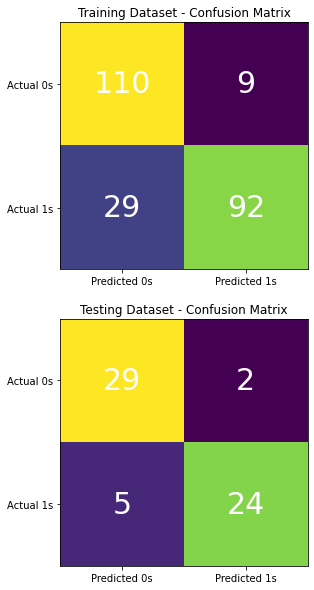

In [ ]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm = confusion_matrix(y_real, y_pred)

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_train)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Training Dataset - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_train[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Testing Dataset - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

#### Predictive Classification x Real Classification 
(20% of the dataset)

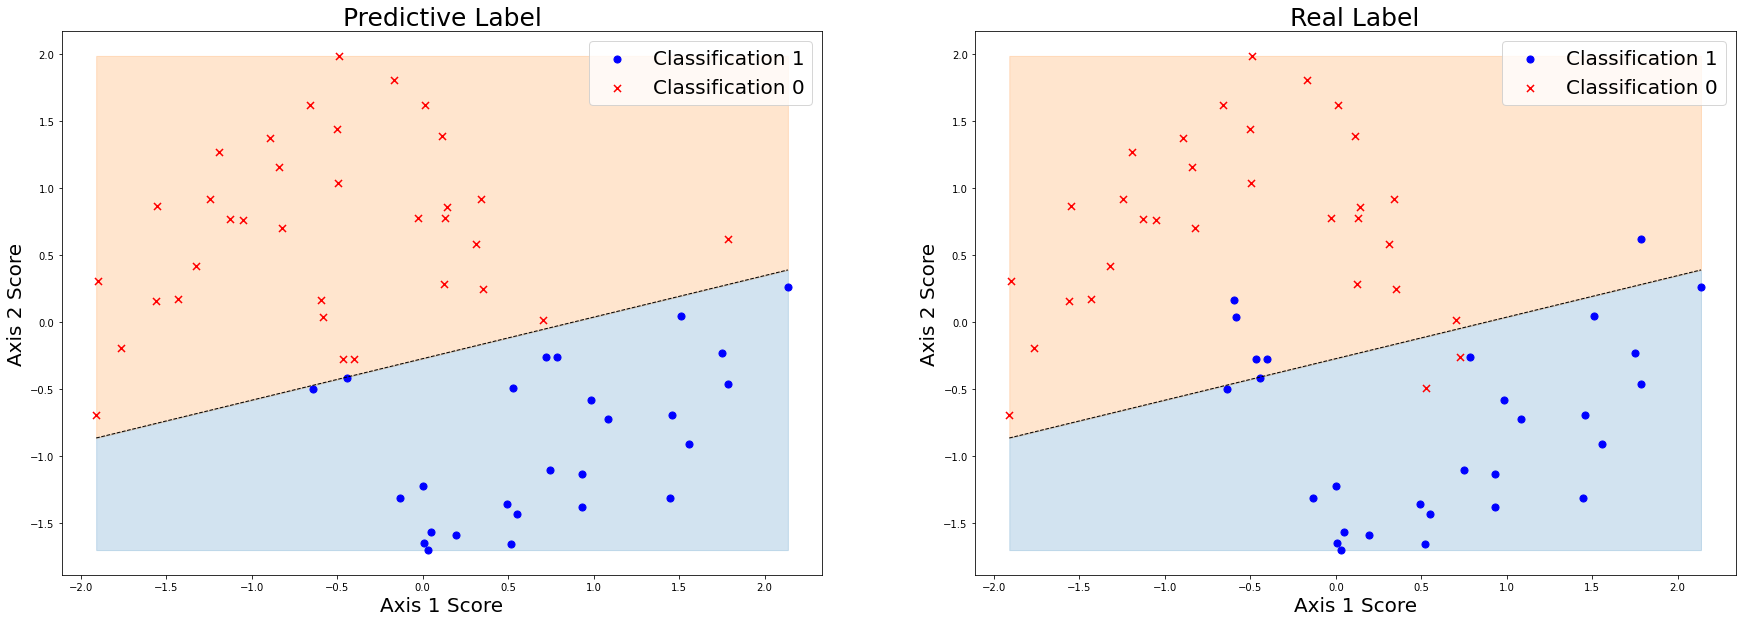

In [ ]:
#Defining Data Frame
df = pd.DataFrame(x_test, columns={'Axis1', 'Axis2'})
df['y_real'] = y_real
df['y_pred'] = y_pred


Valor1 = df[df['y_pred'].isin([1])]
Valor0 = df[df['y_pred'].isin([0])]

Valor_Real_1 = df[df['y_real'].isin([1])]
Valor_Real_0 = df[df['y_real'].isin([0])]

#plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and slope of the decision boundary
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary
xmin, xmax = min(df['Axis1']), max(df['Axis1'])
ymin, ymax =  min(df['Axis2']), max(df['Axis2'])

xd = np.array([xmin, xmax])
yd = m*xd + c

#Predictive Data
ax1.plot(xd, yd, 'k', lw=1, ls='--')
ax1.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax1.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

ax1.scatter(Valor1["Axis1"],Valor1['Axis2'],s=50, c='b',marker='o', label='Classification 1')
ax1.scatter(Valor0["Axis1"],Valor0['Axis2'],s=50, c='r',marker='x', label='Classification 0')
ax1.legend(fontsize=20)
ax1.set_xlabel('Axis 1 Score',fontsize=20)
ax1.set_ylabel('Axis 2 Score',fontsize=20)
ax1.set_title('Predictive Label',fontsize=25)

#Real Data
ax2.plot(xd, yd, 'k', lw=1, ls='--')
ax2.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
ax2.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

ax2.scatter(Valor_Real_1["Axis1"],Valor_Real_1['Axis2'],s=50, c='b',marker='o', label='Classification 1')
ax2.scatter(Valor_Real_0["Axis1"],Valor_Real_0['Axis2'],s=50, c='r',marker='x', label='Classification 0')
ax2.legend(fontsize=20)
ax2.set_xlabel('Axis 1 Score',fontsize=20)
ax2.set_ylabel('Axis 2 Score',fontsize=20)
ax2.set_title('Real Label', fontsize = 25)

fig.show()

#### Scores Evaluation

In [ ]:
print(f"Model Score with initial parameters (20% data): {model_score_b:.2f}" )
print(f"Model Score with new parameters (20% data): {model_score_c:.2f}")

Model Score with initial parameters (20% data): 0.83
Model Score with new parameters (20% data): 0.88


## Answer c):


Yes, it is possible to improve the accuracy of the classification prediction by adjusting some parameters.


* **Point 1:** Increasing the number of interactions (max_inter) so that the model can recalculate the minimum cost and define W's (weights) for better point classification.


* **Point 2:** Decrease the value of the learning rate because as each interaction passes, the algorithm will take a smaller step in search of the smallest error. In this way, the algorithm will analyze more points to recalculate errors.


* **Point 3:** Normalize the data to keep them on the same scale, which facilitates the learning of the algorithm in identifying similar patterns of points.


Otherwise, there is a limitation regarding the improvement of the model considering the dataset characteristics. The Moon dataset is a swirl pattern with non-linear data points, thus a linear model approach such as logistic regression will reach a limit as the model tries to separate the classes from the middle, but in general there will remain a few misclassified points. In order to improve the accuracy after a specific point, it will require a more complex classifier with a non-linear decision boundary.

---
## **2.Neural Network** 
(consider the same dataset used for the Logistic Regression exercise.)

a) Implement a model based on a single perceptron, train it and compare the results with the logistic
regression model.

b) Test the same single perceptron with a more challenging synthetic dataset and compare the results
with the previous dataset. Consider using the sklearn.datasets.make circles generator.

c) Propose and implement a more complex model based on a neural network that can achieve a better
performance. Explain why the changes you made to the model resulted in a better performance.


## a)

### Mooon Dataset

In [ ]:
# generate 2d classification dataset
X_train, X_test, y_train, y_test = x_train_2, x_test_2, y_train_2, y_real_2

### Model
* One neuron in the input/output layer with activation function of **sigmoid**

In [ ]:
model_perceptron_m = Sequential()
model_perceptron_m .add(Dense(1,input_dim=2, activation='sigmoid'))

### Compilation
* **Error function:** `Binary Crossentropy` loss function. 
* **Adam** is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [ ]:
model_perceptron_m.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [ ]:
model_perceptron_m.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [ ]:
results = model_perceptron_m.fit(X_train, y_train , epochs=200, verbose=0, validation_data=(X_test, y_test))

### Comparison between Single Perceptron of Sigmoid x Logistic Regression
(20 % of the dataset:)

### Classification Report

In [ ]:
#predict
y_result = (model_perceptron_m.predict(X_test) > 0.5).astype("int").reshape(60,)

#### Classification Matrix
print('Logistic Regression:')
print(" ")
report = classification_report(y_real, y_pred)
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('Neural Network with Single Perceptron Sigmoid:')
print(" ")
report = classification_report(y_test, y_result)
print(report)

Logistic Regression:
 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.92      0.83      0.87        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

 
 
Neural Network with Single Perceptron Sigmoid:
 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.88        29

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



### Confusion Matrix

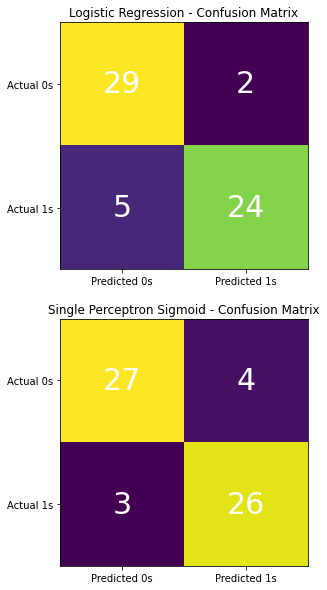

In [ ]:
# Confusion Matrix
cm_log = confusion_matrix(y_real, y_pred)
cm_neural = confusion_matrix(y_test, y_result)

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_log)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Logistic Regression - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_log[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm_neural)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Single Perceptron Sigmoid - Confusion Matrix")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_neural[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

### Visualize Evaluation - Single Perceptron of Sigmoid

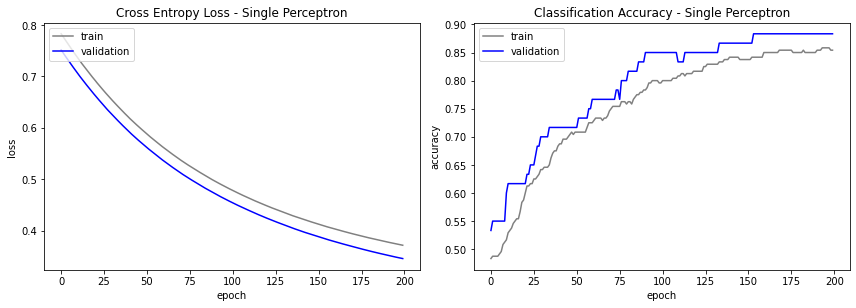

In [ ]:
plt.figure(figsize=(12, 16))


plt.subplot(4, 2, 1)
plt.title('Cross Entropy Loss - Single Perceptron')
plt.plot(results.history['loss'], color='gray')
plt.plot(results.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
plt.subplot(4, 2, 2)
plt.title('Classification Accuracy - Single Perceptron')
plt.plot(results.history['accuracy'], color='gray')
plt.plot(results.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

#Display
plt.tight_layout()
plt.show()

### **Answer a):**


* **Point 1:** Comparison with Logistic Regression


After a few training iterations, the single perceptron model averaged a **score of *0.88**, while the logistic regression averaged a **score of around *0.88**.


* **Point 2:** Performance of the Model


From the plot of the **Cross Entropy Loss**, the model has comparable performance on both the training and validation datasets (test label). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch. Thus, increasing the number of epochs is still an alternative to reducing the loss because, over the iterations, the loss is decreasing and, graphically, the distance between the lines continues to be the "same".

From the plot of the **Classification Accuracy**, the model could probably be trained a bit more as the trend for accuracy on the training dataset is still rising, even if for the test dataset there has been a constant over the last iterations. Also, the model has not yet overlearned the training dataset, showing comparable skill on both datasets.

To sum up, the single perceptron sequential model, using 200 epochs and 20% of the dataset for evaluation, has similar accuracy in classification compared to the logistic regression model. Besides, the analysis performed on Point 2 shows that the single perceptron has a few spaces to achieve better classification results.

However, for a single perceptron, it is also observed that there is a model limitation considering the characteristics of the dataset, and to achieve better results, it required a more complex classifier that could handle better the non-linear characteristics of the Moon dataset.


**Those values might change when the notebook runs again.**


## b)

#### Circles Dataset

In [ ]:
x,y = make_circles(n_samples=300, noise= 0.05, random_state=21)

#### Visualize Data

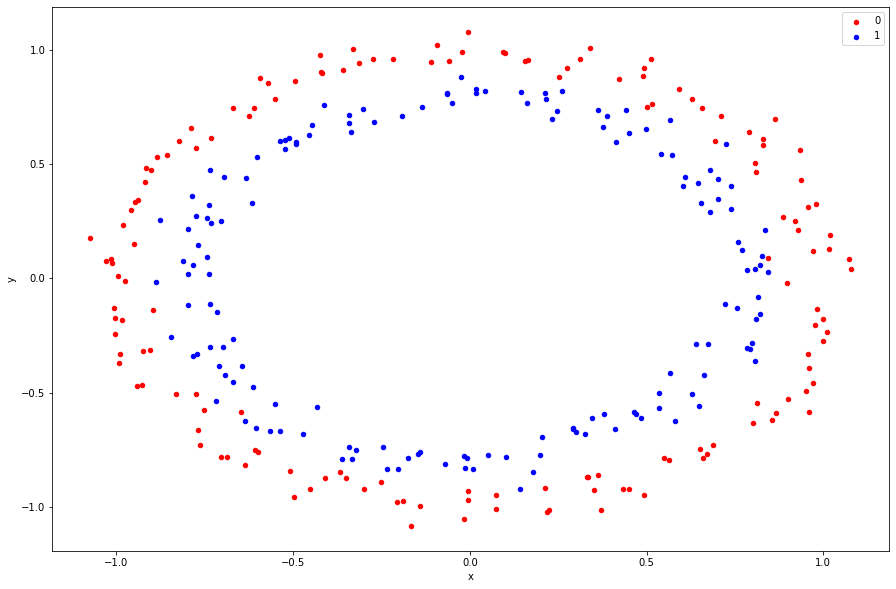

In [ ]:
# scatter plot
df = pd.DataFrame(dict(x=x[:,0],y=x[:,1], label=y))
colors = {0:'red',1:'blue'}
fig, ax = plt.subplots(figsize = (15,10))
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter',x='x', y='y', label = key, color = colors[key])
plt.show()

#### Split the data


In [ ]:
# Define Variables
#target = df.label
#df.drop(['label'], axis = 1 , inplace = True)

#Variables
#y = target
#x = df

#split
circle_x_train, circle_x_test, circle_y_train, circle_y_test = train_test_split(x,y, test_size=0.20, random_state=1)
circle_x_train.shape, circle_y_train.shape,  circle_x_test.shape , circle_y_test.shape

((240, 2), (240,), (60, 2), (60,))

### Model
* One neuron in the input/output layer with activation function of **sigmoid**

In [ ]:
model_perceptron = Sequential()
model_perceptron.add(Dense(1,input_dim=2, activation='sigmoid'))

### Compilation
* **Error function:** `Binary Crossentropy` loss function. 
* **Adam** is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [ ]:
model_perceptron.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_perceptron.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [ ]:
results_circle = model_perceptron.fit(circle_x_train, circle_y_train , epochs=100, verbose=0,validation_data=(circle_x_test, circle_y_test))

### Comparison between Single Perceptron Moon Dataset x Single Perceptron Circle Dataset
(20 % of the dataset:)

### Classification Report

In [ ]:
#predict
circle_y_pred = (model_perceptron.predict(circle_x_test) > 0.5).astype("int").reshape(60,)

#### Classification Matrix
print('Single Perceptron of Sigmoid - Moon Dataset:')
print(" ")
report = classification_report(y_test, y_result)
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('Single Perceptron of Sigmoid - Circle Dataset:')
print(" ")
report = classification_report(circle_y_test, circle_y_pred)
print(report)

Single Perceptron of Sigmoid - Moon Dataset:
 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.88        29

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

 
 
Single Perceptron of Sigmoid - Circle Dataset:
 
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        32
           1       0.50      0.64      0.56        28

    accuracy                           0.53        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.53      0.53        60



### Confusion Matrix

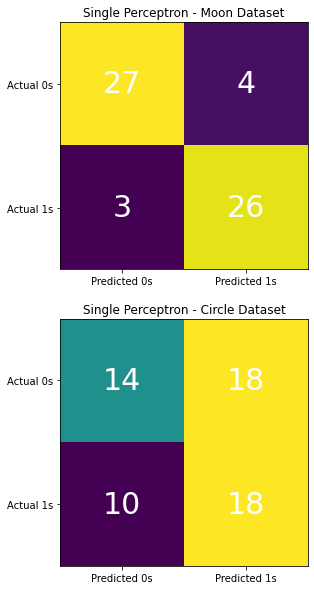

In [ ]:
# Confusion Matrix
cm_neural_moon = confusion_matrix(y_test, y_result)
cm_neural_circle = confusion_matrix(circle_y_test, circle_y_pred)


fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_neural_moon)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Single Perceptron - Moon Dataset")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_neural_moon[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm_neural_circle)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Single Perceptron - Circle Dataset")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_neural_circle[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

### Visualize Evaluation

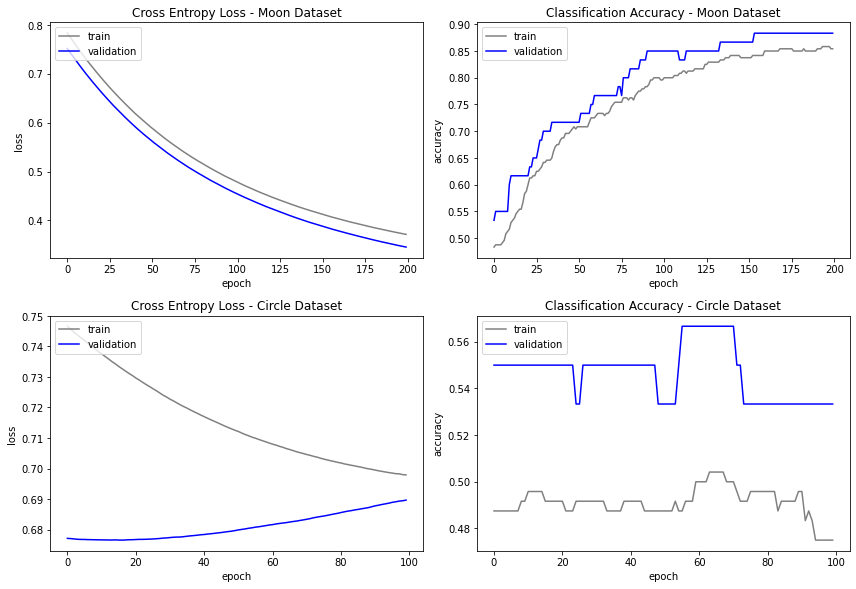

In [ ]:
plt.figure(figsize=(12, 16))

# single perceptron loss
plt.subplot(4, 2, 1)
plt.title('Cross Entropy Loss - Moon Dataset')
plt.plot(results.history['loss'], color='gray')
plt.plot(results.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# single perceptron accuracy
plt.subplot(4, 2, 2)
plt.title('Classification Accuracy - Moon Dataset')
plt.plot(results.history['accuracy'], color='gray')
plt.plot(results.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# single perceptron accuracy
plt.subplot(4, 2, 3)
plt.title('Cross Entropy Loss - Circle Dataset')
plt.plot(results_circle.history['loss'], color='gray')
plt.plot(results_circle.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
plt.subplot(4, 2, 4)
plt.title('Classification Accuracy - Circle Dataset')
plt.plot(results_circle.history['accuracy'], color='gray')
plt.plot(results_circle.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

#Display
plt.tight_layout()
plt.show()

### Answer b):


* **Point 1:** Comparison between the Moon Dataset and the Circle Dataset


We can see here that on average, the single perceptron model for **moon dataset** was able to achieve an **accuracy of 88%**. Although, in **circle dataset**, the sigle perceptron reach the **accuracy of 53%**. 


* **Point 2:** Performance of the model on both datasets


The _loss function_ in a neural network quantifies the difference between the expected outcome and the outcome produced by the machine learning model. From the plot of the **Cross Entropy Loss**, the model has comparable performance on both the training and validation datasets (test label). The **Single Perceptron Model for the Moon Dataset** is converging to a smaller distance between the train loss line and test loss line, which means that the cost is reduced through each epoch. Plus, the classification accuracy - moon dataset proves it because accuracy is getting higher and the distance between the train and test line is closer. 


On the other hand, the distance between train loss line and test loss line in **Single Perceptron Model for the Circle dataset** keeps the same over epochs, the cost has a small reduction which directly impacts the accuracy of the model. The classification accuracy for the circle dataset shows that the accuracy remains constant throughout the iterations and the distance between train and test lines increases, which proves the lack of integrity of the current model for predicting a non-linear data set. **The model accuracy for the circle dataset is around 50% plus the noise set. Whatever model draws the linear line, it will misclassify approximately half of the points due to the inherent characteristics of the dataset.**


To sum up, the Single Perceptron Sequential Model has a **better performance** for **moon dataset** rather than **circle dataset**, even though both are datasets with non-linear characteristics. A neural network with more layers and neurons can create a non-linear problem that can be used to better classify these two datasets.


*Those values might change when the notebook runs again.

## c)

### **Model:** Recurrent Neural Networks
Recurrent Neural Networks, or RNNs, were designed to work with **sequence prediction problems**

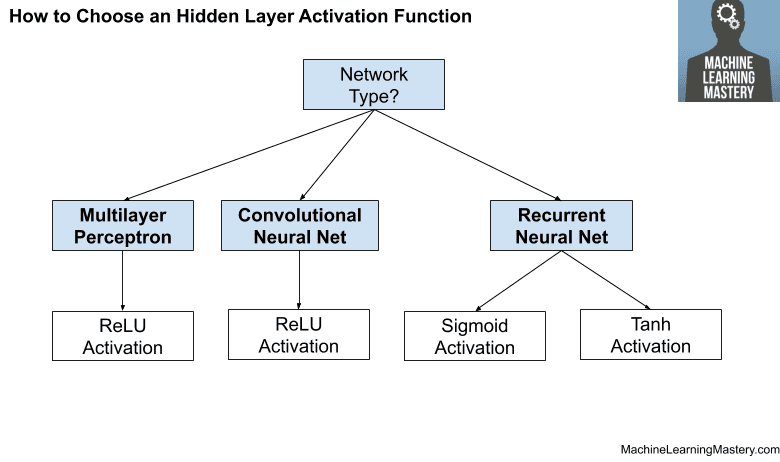

#### **> Input Layer:**
    
    1. moon dataset
    
    2. circle dataset

#### **>Hidden Layer**
(A neural network will almost always have the same activation function in all hidden layers.)

**First Layer:** 

* Activation Fucntion: **Tahn**
* Input neurons having dimension of 2
* Dense layer having `15 neurons`
* 45 Trainable parameters

**Second Layer:** 

* Activation Fucntion: **Tanh**
* Dense layer having `5 neurons`
* 80 Trainable parameters

#### **>Output Layer**

* Activation Fucntion: **Sigmoid**
* Dense layer having `1 neurons`
* Output: 2 different classifications


In [ ]:
model_m = Sequential()
model_m.add(Dense(15, input_dim=2, activation='tanh'))
model_m.add(Dense(5, activation='tanh'))
model_m.add(Dense(1, activation='sigmoid'))

### Compilation
* **Error function:** ‘Binary Crossentropy’ loss function. 
* **Adam** is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [ ]:
model_m.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_m.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 15)                45        
                                                                 
 dense_99 (Dense)            (None, 5)                 80        
                                                                 
 dense_100 (Dense)           (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### **1. Moon Dataset**

In [ ]:
new_results_moon = model_m.fit(X_train, y_train , epochs=200, verbose=0, validation_data=(X_test,y_test))

#### Comparison Classifications between Old Model x New Model
(20 % of the dataset:)

#### Classification Report

In [ ]:
#predict
y_new_result = (model_m.predict(X_test) > 0.5).astype("int").reshape(60,)

print('MOON DataSet')
print('')
print('')
#### Classification Matrix
print('Neural Network with single perceptron of Sigmoid:')
print(" ")
report = classification_report(y_test, y_result)
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('Recurrent Neural Networks:')
print(" ")
report = classification_report(y_test, y_new_result)
print(report)

MOON DataSet


Neural Network with single perceptron of Sigmoid:
 
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.88        29

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

 
 
Recurrent Neural Networks:
 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.97      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



#### Confusion Matrix

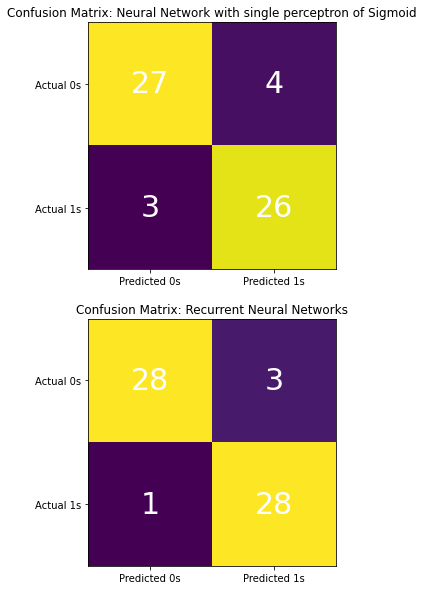

In [ ]:
# Confusion Matrix
cm_old = confusion_matrix(y_test, y_result)
cm_new = confusion_matrix(y_test, y_new_result)

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_old)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Confusion Matrix: Neural Network with single perceptron of Sigmoid")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_old[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm_new)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Confusion Matrix: Recurrent Neural Networks")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_new[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

#### Visualize Evaluation

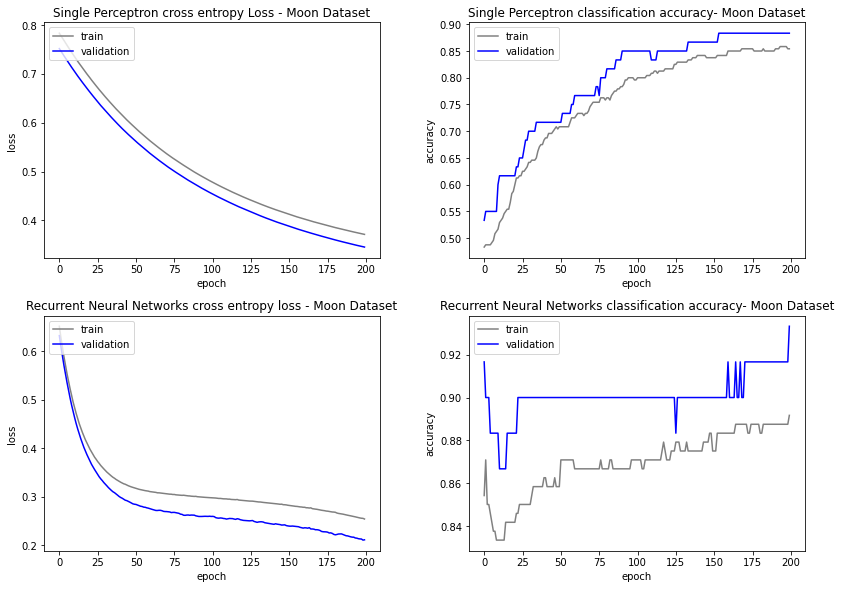

In [ ]:
plt.figure(figsize=(12, 16))

# single perceptron accuracy
plt.subplot(4, 2, 1)
plt.title('Single Perceptron cross entropy Loss - Moon Dataset')
plt.plot(results.history['loss'], color='gray')
plt.plot(results.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
plt.subplot(4, 2, 2)
plt.title('Single Perceptron classification accuracy- Moon Dataset')
plt.plot(results.history['accuracy'], color='gray')
plt.plot(results.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# neural network accuracy
plt.subplot(4, 2, 3)
plt.title('Recurrent Neural Networks cross entropy loss - Moon Dataset')
plt.plot(new_results_moon.history['loss'], color='gray')
plt.plot(new_results_moon.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize hist for accuracy
plt.subplot(4, 2, 4)
plt.title('Recurrent Neural Networks classification accuracy- Moon Dataset')
plt.plot(new_results_moon.history['accuracy'], color='gray')
plt.plot(new_results_moon.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

#Display
plt.tight_layout()
plt.show()

### **2. Circle Dataset**

In [ ]:
model_c = Sequential()
model_c.add(Dense(15, input_dim=2,activation='relu'))
model_c.add(Dense(5, activation='tanh'))
model_c.add(Dense(1, activation='sigmoid'))

In [ ]:
model_c.build(circle_x_test.shape) 

In [ ]:
model_c.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_c.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 15)                45        
                                                                 
 dense_102 (Dense)           (None, 5)                 80        
                                                                 
 dense_103 (Dense)           (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


#### Learnin Rate

In [ ]:
import keras.backend as K
print(K.eval(model_c.optimizer.lr))

0.001


In [ ]:
new_results_circle = model_c.fit(circle_x_train, circle_y_train , epochs=400, verbose=0, validation_data=(circle_x_test, circle_y_test))

#### Comparison Classifications between Old Model x New Model
(20 % of the dataset)

#### Classification

In [ ]:
#predict
circle_y_new_result = (model_c.predict(circle_x_test) > 0.5).astype("int").reshape(60,)

print('Circle DataSet')
print('')
print('')
#### Classification Matrix
print('Neural Network with single perceptron of Sigmoid:')
print(" ")
report = classification_report(circle_y_test, circle_y_pred)
print(report)
print(" ")
print(" ")

#### Classification Matrix
print('Recurrent Neural Networks:')
print(" ")
report = classification_report(circle_y_test, circle_y_new_result)
print(report)

Circle DataSet


Neural Network with single perceptron of Sigmoid:
 
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        32
           1       0.50      0.64      0.56        28

    accuracy                           0.53        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.53      0.53        60

 
 
Recurrent Neural Networks:
 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.90      0.96      0.93        28

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



#### Confusion Matrix

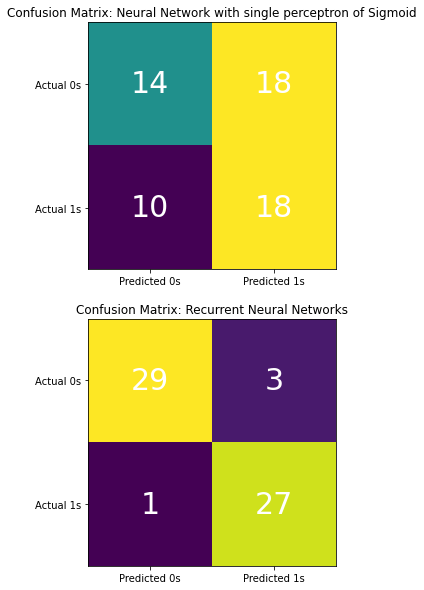

In [ ]:
# Confusion Matrix
cm_old = confusion_matrix(circle_y_test, circle_y_pred)
cm_new = confusion_matrix(circle_y_test, circle_y_new_result)


fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(cm_old)
axs[0].grid(False)
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[0].set_ylim(1.5, -0.5)
axs[0].set_title("Confusion Matrix: Neural Network with single perceptron of Sigmoid")
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_old[i, j], ha='center', va='center', color='WHITE', fontsize=30)

axs[1].imshow(cm_new)
axs[1].grid(False)
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axs[1].set_ylim(1.5, -0.5)
axs[1].set_title("Confusion Matrix: Recurrent Neural Networks")
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_new[i, j], ha='center', va='center', color='WHITE', fontsize=30)
plt.show()

#### Visualize Evaluation

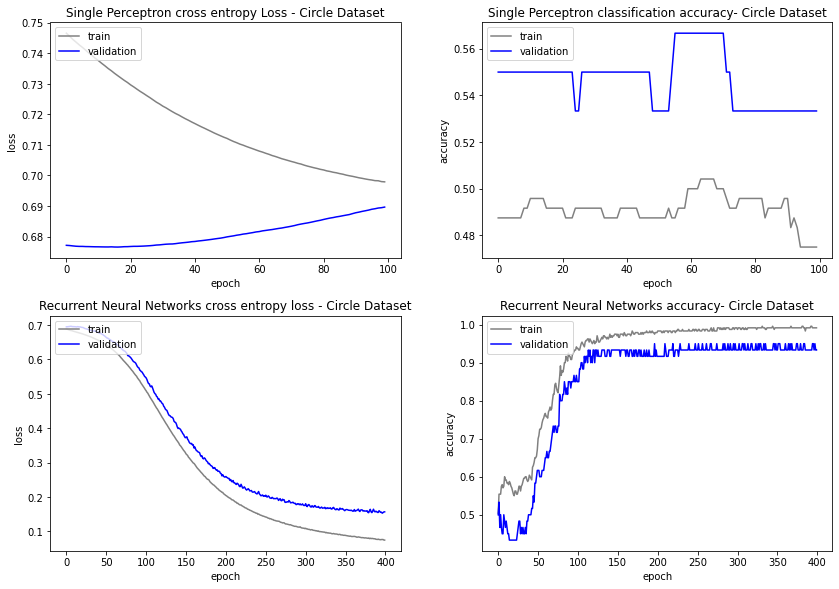

In [ ]:
plt.figure(figsize=(12, 16))

# single perceptron accuracy
plt.subplot(4, 2, 1)
plt.title('Single Perceptron cross entropy Loss - Circle Dataset')
plt.plot(results_circle.history['loss'], color='gray')
plt.plot(results_circle.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
plt.subplot(4, 2, 2)
plt.title('Single Perceptron classification accuracy- Circle Dataset')
plt.plot(results_circle.history['accuracy'], color='gray')
plt.plot(results_circle.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# neural network accuracy
plt.subplot(4, 2, 3)
plt.title('Recurrent Neural Networks cross entropy loss - Circle Dataset')
plt.plot(new_results_circle.history['loss'], color='gray')
plt.plot(new_results_circle.history['val_loss'], color='blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize hist for accuracy
plt.subplot(4, 2, 4)
plt.title('Recurrent Neural Networks accuracy- Circle Dataset')
plt.plot(new_results_circle.history['accuracy'], color='gray')
plt.plot(new_results_circle.history['val_accuracy'],color='blue')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

#Display
plt.tight_layout()
plt.show()

### Answer c):

Adding more layers to our model increases its ability to learn the dataset’s features more deeply, which means that the model has more capacity to draw complex lines as a decision boundary. In this way, it increases the accuracy for both datasets, especially for the circle dataset due to its inherent characteristics, which had poor accuracy on a single perceptron model, but on **a multiple perceptrons after 400 epochs it was possible to achieve the accuracy of 93%.**